In [1]:
# Base libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# My model, metrics and preprocessing methods
from src.models.tree import *
from src.metrics import *


In [2]:
df = pd.read_csv('src/data/Bank_Personal_Loan_Modelling.csv')

In [3]:
df.describe()

,Unnamed: 0,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2499.500000,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,0.000000,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1249.750000,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2499.500000,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3749.250000,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,4999.000000,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   ID                  5000 non-null   int64  
 2   Age                 5000 non-null   int64  
 3   Experience          5000 non-null   int64  
 4   Income              5000 non-null   int64  
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Personal Loan       5000 non-null   int64  
 11  Securities Account  5000 non-null   int64  
 12  CD Account          5000 non-null   int64  
 13  Online              5000 non-null   int64  
 14  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 586.1 KB


In [5]:
X, y = df.drop(['Personal Loan', 'ZIP Code', 'Unnamed: 0', 'ID'], axis=1), df['Personal Loan']

In [6]:
from src.preprocessing import normalize
X['Age'] = normalize.min_max(X['Age'])
X['Experience'] = normalize.min_max(X['Experience'])
X['Income'] = normalize.min_max(X['Income'])

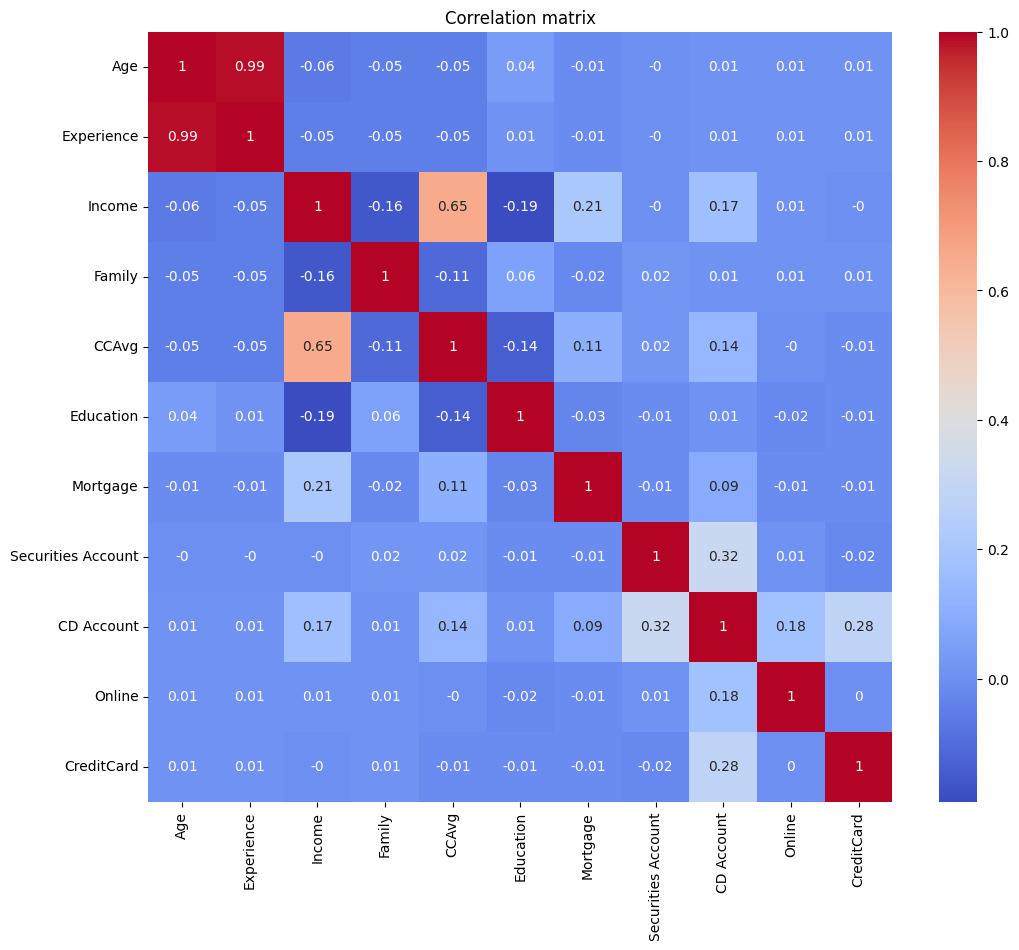

In [7]:
plt.figure(figsize=(12, 10))
plt.title('Correlation matrix')
corr = np.round(X.corr(), 2)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [8]:
from src.preprocessing.one_hot import one_hot 
X = one_hot(X, ['CreditCard', 'Online', 'Securities Account', 'CD Account', 'Family'])

In [9]:
from src.preprocessing.train_test_split import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X, y, (0.8, 0.2))

In [21]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = my_accuracy_score(y_test, y_pred)
pres = my_precision_score(y_test, y_pred)
rec = my_recall_score(y_test, y_pred)
f1 = my_f1_score(y_test, y_pred)
auc = ROC_AUC(y_test, y_pred)
print(acc, pres, rec, f1, auc)

0.985 0.9156626506024096 0.9047619047619048 0.9101796407185628 0.9451029320024952
